# Face Detection with Haar Cascades

In [23]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
model = cv2.imread('image_01.png',0)
withglass = cv2.imread('image_02.png',0)
group = cv2.imread('image_03.png',0)

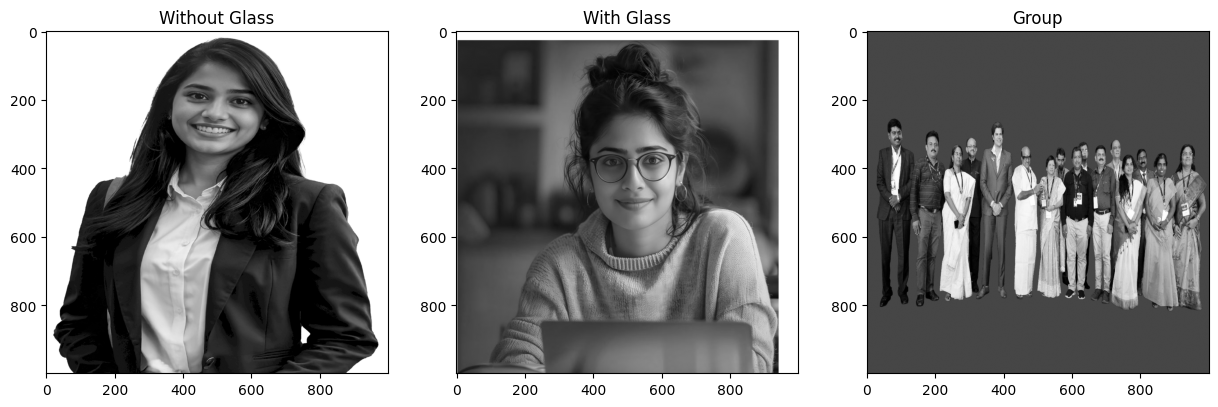

In [25]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.resize(model, (1000, 1000)), cmap='gray')
plt.title('Without Glass')
plt.subplot(1, 3, 2)
plt.imshow(cv2.resize(withglass, (1000, 1000)), cmap='gray')
plt.title('With Glass')
plt.subplot(1, 3, 3)
plt.imshow(cv2.resize(group, (1000, 1000)), cmap='gray')
plt.title('Group')
plt.show()

# Face Detection

In [29]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [30]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

In [31]:
result = detect_face(model)

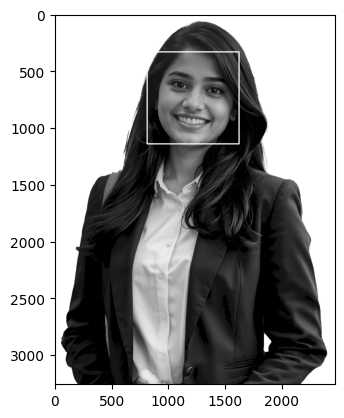

In [32]:
plt.imshow(result,cmap='gray')
plt.show()

In [33]:
result = detect_face(withglass)

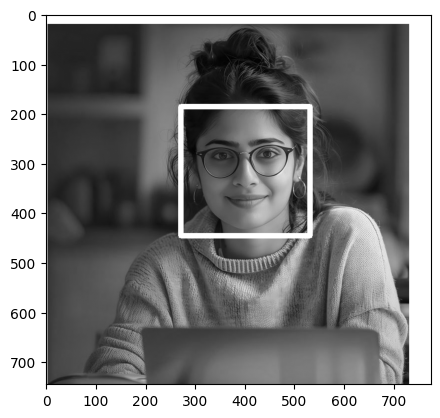

In [34]:
plt.imshow(result,cmap='gray')
plt.show()

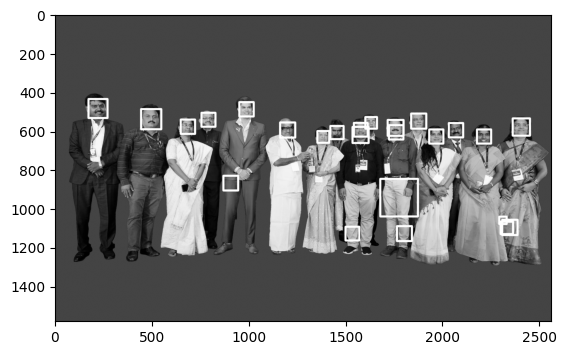

In [35]:
result = detect_face(group)
plt.imshow(result,cmap='gray')
plt.show()

# Eye Cascade File

In [36]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [37]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

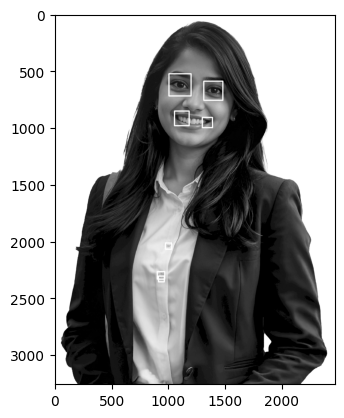

In [38]:
result = detect_eyes(model)
plt.imshow(result,cmap='gray')
plt.show()

In [39]:
eyes = eye_cascade.detectMultiScale(withglass) 

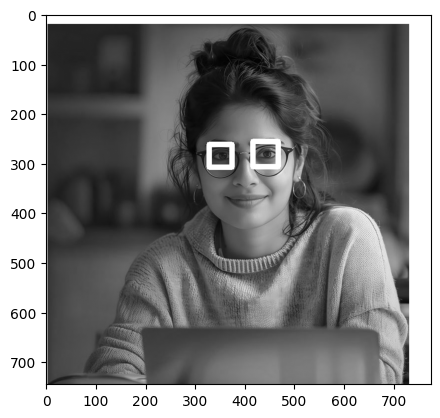

In [40]:
result = detect_eyes(withglass)
plt.imshow(result,cmap='gray')
plt.show()

# Conjunction with Video
## DHANUSH P
## 212223230042

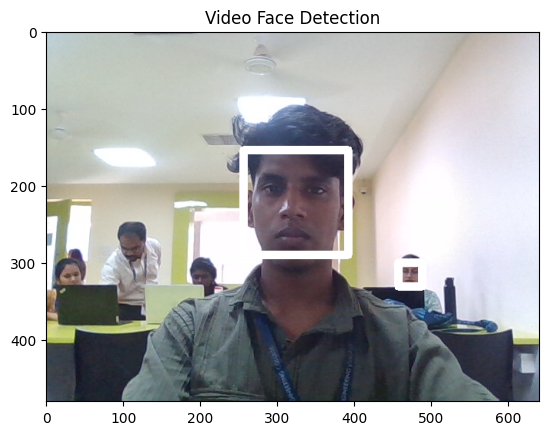

In [ ]:
cap = cv2.VideoCapture(0)
plt.ion()
fig, ax = plt.subplots()
ret, frame = cap.read(0)
frame = detect_face(frame)
im = ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Video Face Detection')
while True:
    ret, frame = cap.read(0)
    frame = detect_face(frame)
    im.set_data(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.pause(300)

cap.release()
plt.close()